# BCU and unk class analysis

<h5 style="text-align:right; margin-right:15px"> 2023-10-22 10:55</h5>

Here I use the 4FGL-DR4 3-class classification to examine the sources associated as "bcu" or "unk".
Each class has an association, but of uncertain type, so were not used for training.

In this notebook, we look at the correlation of the three predicted types with respect to the diffuse flux, which 
seems to nicely separate pulsars into young and MSP groups. 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa0c1d97fd0>

### Add diffuse flux to sources  

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

## Diffuse flux for `bcu` associations

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa0a82da3e0>
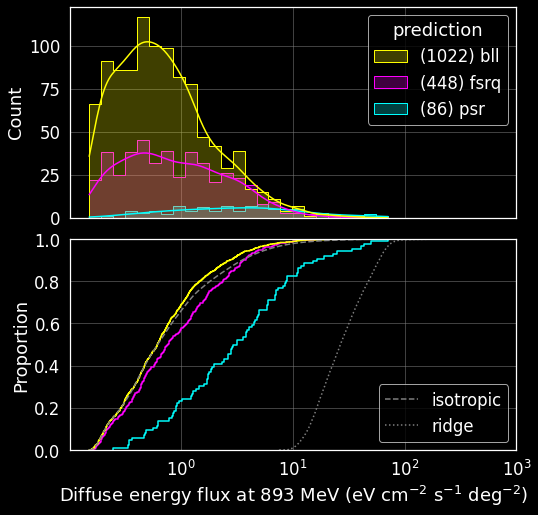

## Diffuse flux for `unk` associations

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7fa0a81597e0>
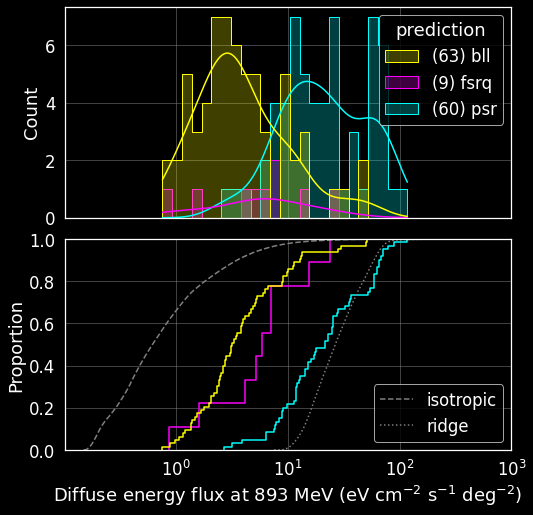

In [1]:
%run pylib/machine_learning dark
self = ML(title='BCU and unk class analysis',  model='fgl'  )
show("""Here I use the 4FGL-DR4 3-class classification to examine the sources associated as "bcu" or "unk".
Each class has an association, but of uncertain type, so were not used for training.

In this notebook, we look at the correlation of the three predicted types with respect to the diffuse flux, which 
seems to nicely separate pulsars into young and MSP groups. 

""")
show(self.setup_output)
self.df['association'] = self.df.apply(lambda row: row.association if row.class1!='unk' else 'unk', axis=1)
self.train_predict(show_confusion=False)

show(f"""### Add diffuse flux to sources  """)
from pylib.diffuse import *
diff = Diffuse()
df = self.df
df['diffuse'] = diff.get_values_at(df)

for cls in 'bcu unk'.split():
    diff.show_diffuse_flux(df.query(f'association=="{cls}"'),
                        hue_kw=dict(hue='prediction', 
                            hue_order=self.mlspec.target_names, 
                            palette=self.palette),
                        title=f"""## Diffuse flux for `{cls}` associations""" )